<a href="https://colab.research.google.com/github/adi387/C-Code-Snips/blob/main/Copy_of_Stock_Price_Prediction_Using_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Uploading Data

In [ ]:
df = pd.read_csv('TSLA.csv') # uploading data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2882,2021-12-08,1052.709961,1072.380005,1033.000000,1068.959961,1068.959961,13968800
2883,2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19812800
2884,2021-12-10,1008.750000,1020.979980,982.530029,1017.030029,1017.030029,19855000
2885,2021-12-13,1001.090027,1005.000000,951.419983,966.409973,966.409973,26198500
2886,2021-12-14,945.000000,966.409973,930.000000,958.510010,958.510010,23533000


##Spliting Train and Test Data

In [ ]:
train = df[df['Date']< '2020-01-01'].copy() # elements dating before 1st Jan,2020 in train set
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2389,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2390,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2391,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2392,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [ ]:
test = df[df['Date']> '2020-01-01'].copy() #elements with date after 1st Jan,2020 in test set.
test

,Date,Open,High,Low,Close,Adj Close,Volume
2394,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2395,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2396,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2397,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2398,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
2882,2021-12-08,1052.709961,1072.380005,1033.000000,1068.959961,1068.959961,13968800
2883,2021-12-09,1060.640015,1062.489990,1002.359985,1003.799988,1003.799988,19812800
2884,2021-12-10,1008.750000,1020.979980,982.530029,1017.030029,1017.030029,19855000
2885,2021-12-13,1001.090027,1005.000000,951.419983,966.409973,966.409973,26198500


In [ ]:
test.shape

(493, 7)

##Data Preprocessing

In [ ]:
# Removing usless columns from the dataframe
train = train.drop(['Date','Adj Close'],axis =1)
test = test.drop(['Date','Adj Close'],axis =1)
train.head()

,Open,High,Low,Close,Volume
0,3.800,5.000,3.508,4.778,93831500
1,5.158,6.084,4.660,4.766,85935500
2,5.000,5.184,4.054,4.392,41094000
3,4.600,4.620,3.742,3.840,25699000
4,4.000,4.000,3.166,3.222,34334500


In [ ]:
# Scaling the data b/w 0 and 1.
scaler = MinMaxScaler() 
train = scaler.fit_transform(train)
train

array([[0.00682806, 0.0199914 , 0.00622311, 0.0194874 , 0.50337694],
       [0.02303872, 0.03293685, 0.0202251 , 0.01934287, 0.46074816],
       [0.02115265, 0.02218878, 0.01285947, 0.01483837, 0.21865873],
       ...,
       [1.        , 1.        , 0.99941662, 0.99865096, 0.2652745 ],
       [0.98517408, 0.98492891, 0.95845589, 0.96088064, 0.33655731],
       [0.92837702, 0.96651389, 0.94100205, 0.96962466, 0.27445243]])

## Creating Training Dataset

In [ ]:
#defining x_train and y_train as empty list
x_train = []
y_train = []

In [ ]:
for i in range(10,train.shape[0]):
  x_train.append(train[i-10:i])
  y_train.append(train[i,0])

# NOTE 
# 1.Here we are considering a moving window of length 90 and we intend to predict the stock price of 91st day
# 2. train.shape[0] gives the length of the train dataframe

In [ ]:
# now we will convert the list to numpy array because numpy arrays are faster than list and consumes less memory
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape

(2384, 10, 5)

In [ ]:
y_train.shape

(2384,)

## Training Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
# We are using Sequential model because we have precisely one input tensor and one output tenser in each unit.
regression = Sequential() 

#Creating input layer
#return_sequencs -> True if we want to return the input sequence for the next cell or not. 
#True bcuz our network is multi layer
regression.add(LSTM(units = 50, activation = 'relu', return_sequences=True,input_shape = (x_train.shape[1],5)))

# Dropout to prevent overfitting
regression.add(Dropout(0.2))

In [ ]:
#Hidden Layers
regression.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
regression.add(Dropout(0.3))
regression.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
regression.add(Dropout(0.4))
regression.add(LSTM(units = 120, activation = 'relu'))
regression.add(Dropout(0.5))

#Output layer
regression.add(Dense(units = 1))

In [ ]:
regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 10, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 10, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
#Configuring the model for training.
regression.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Training the model
regression.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
75/75 [==============================] - 10s 62ms/step - loss: 0.0431
Epoch 2/10
75/75 [==============================] - 5s 66ms/step - loss: 0.0077
Epoch 3/10
75/75 [==============================] - 5s 68ms/step - loss: 0.0085
Epoch 4/10
75/75 [==============================] - 6s 74ms/step - loss: 0.0062
Epoch 5/10
75/75 [==============================] - 5s 68ms/step - loss: 0.0067
Epoch 6/10
75/75 [==============================] - 5s 68ms/step - loss: 0.0057
Epoch 7/10
75/75 [==============================] - 5s 69ms/step - loss: 0.0062
Epoch 8/10
75/75 [==============================] - 5s 70ms/step - loss: 0.0054
Epoch 9/10
75/75 [==============================] - 5s 69ms/step - loss: 0.0054
Epoch 10/10
75/75 [==============================] - 5s 61ms/step - loss: 0.0052


## Creating Test Dataset

In [ ]:
train = df[df['Date']< '2020-01-01'].copy()
prev_60_days = train.tail(10)
prev_60_days

,Date,Open,High,Low,Close,Adj Close,Volume
2384,2019-12-17,75.797997,77.099998,75.180000,75.797997,75.797997,42484000
2385,2019-12-18,76.125999,79.043999,76.115997,78.629997,78.629997,70605000
2386,2019-12-19,79.463997,81.370003,79.300003,80.807999,80.807999,90535500
2387,2019-12-20,82.057999,82.599998,80.038002,81.117996,81.117996,73763500
2388,2019-12-23,82.356003,84.402000,82.000000,83.844002,83.844002,66598000
2389,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2390,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2391,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2392,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000
2393,2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500


In [ ]:
df2 = prev_60_days.append(test, ignore_index = True)
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,75.797997,77.099998,75.180000,75.797997,75.797997,42484000
1,2019-12-18,76.125999,79.043999,76.115997,78.629997,78.629997,70605000
2,2019-12-19,79.463997,81.370003,79.300003,80.807999,80.807999,90535500
3,2019-12-20,82.057999,82.599998,80.038002,81.117996,81.117996,73763500
4,2019-12-23,82.356003,84.402000,82.000000,83.844002,83.844002,66598000
...,...,...,...,...,...,...,...
498,NaN,1052.709961,1072.380005,1033.000000,1068.959961,NaN,13968800
499,NaN,1060.640015,1062.489990,1002.359985,1003.799988,NaN,19812800
500,NaN,1008.750000,1020.979980,982.530029,1017.030029,NaN,19855000
501,NaN,1001.090027,1005.000000,951.419983,966.409973,NaN,26198500


In [ ]:
df2 = df2.drop(['Date','Adj Close'],axis =1)
df2.head()

,Open,High,Low,Close,Volume
0,75.797997,77.099998,75.180000,75.797997,42484000
1,76.125999,79.043999,76.115997,78.629997,70605000
2,79.463997,81.370003,79.300003,80.807999,90535500
3,82.057999,82.599998,80.038002,81.117996,73763500
4,82.356003,84.402000,82.000000,83.844002,66598000


In [ ]:
inputs = scaler.transform(df2)
inputs

array([[ 0.86627987,  0.88103088,  0.87736105,  0.87486141,  0.22616303],
       [ 0.87019528,  0.90424671,  0.88873763,  0.90897039,  0.37798215],
       [ 0.91004151,  0.93202454,  0.92743766,  0.93520253,  0.48558256],
       ...,
       [12.00307979, 12.15312445, 11.90575473, 12.21118153,  0.10399402],
       [11.91164144, 11.9622868 , 11.52762741, 11.60150704,  0.13824119],
       [11.24208566, 11.5014333 , 11.26727804, 11.50635887,  0.12385073]])

## Predicting Stock Price

In [ ]:
x_test = []
y_test = []

In [ ]:
for i in range(10,inputs.shape[0]):
  x_test.append(inputs[i-10:i]) # this will contain prices from 0 to 9th day
  y_test.append(inputs[i,0]) # this will contain price of the 10th day

In [ ]:
x_test = np.array(x_test) #converting list to array
y_test = np.array(y_test)

In [ ]:
y_predict = regression(x_test) 

In [ ]:
scaler.scale_

array([1.19371628e-02, 1.19422954e-02, 1.21545086e-02, 1.20441291e-02,
       5.39878096e-09])

In [ ]:
scale = 1/1.19371628e-02
scale

83.77199982562021

In [ ]:
y_predict = y_predict*scale
y_test = y_test*scale

In [ ]:
y_predict.shape 

TensorShape([493, 1])

In [ ]:
y_predict

<tf.Tensor: shape=(493, 1), dtype=float32, numpy=
array([[  70.45759 ],
       [  71.54702 ],
       [  72.14702 ],
       [  72.45565 ],
       [  72.94783 ],
       [  73.526024],
       [  74.40499 ],
       [  75.15199 ],
       [  76.21453 ],
       [  77.81558 ],
       [  80.06064 ],
       [  82.17797 ],
       [  83.86863 ],
       [  85.7895  ],
       [  87.08835 ],
       [  87.868744],
       [  88.96636 ],
       [  90.56125 ],
       [  91.22944 ],
       [  91.41285 ],
       [  92.4947  ],
       [  94.105125],
       [  96.12012 ],
       [  98.397224],
       [ 100.71103 ],
       [ 103.933235],
       [ 107.48354 ],
       [ 111.06809 ],
       [ 114.231636],
       [ 117.02361 ],
       [ 118.97833 ],
       [ 121.011345],
       [ 121.171684],
       [ 119.52506 ],
       [ 119.8865  ],
       [ 121.196846],
       [ 122.93382 ],
       [ 123.975105],
       [ 125.197266],
       [ 126.094025],
       [ 126.13267 ],
       [ 125.48183 ],
       [ 123.83639 ],
    

In [ ]:
y_test.shape
np.reshape(y_test,(493,1))

array([[  81.67200183],
       [  84.87199782],
       [  84.86600182],
       [  89.05199881],
       [  91.51199781],
       [  96.1919978 ],
       [  93.13000181],
       [  95.4719968 ],
       [ 105.62399678],
       [ 102.72400279],
       [  95.5219998 ],
       [  98.2940028 ],
       [ 102.82200279],
       [ 111.14999777],
       [ 109.62199777],
       [ 110.89799877],
       [ 105.17000278],
       [ 110.46999777],
       [ 111.90999977],
       [ 123.25600074],
       [ 124.77199974],
       [ 131.51000673],
       [ 173.36399464],
       [ 161.42399266],
       [ 136.75599372],
       [ 142.8820007 ],
       [ 156.77199967],
       [ 150.52999569],
       [ 152.34600468],
       [ 145.1399957 ],
       [ 154.21599968],
       [ 165.09200666],
       [ 181.47199662],
       [ 179.16199863],
       [ 178.16799563],
       [ 164.57200266],
       [ 166.57200265],
       [ 153.27199968],
       [ 142.7719997 ],
       [ 122.71200174],
       [ 139.02399871],
       [ 157.771

In [ ]:
date = np.arange(2797)

# Visualization

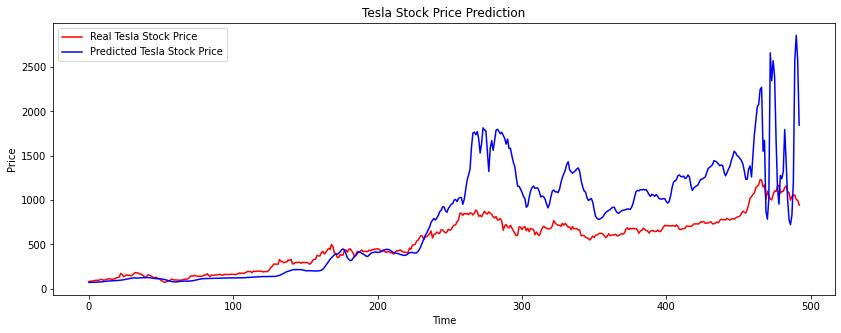

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(y_test,color = 'red',label = 'Real Tesla Stock Price')
plt.plot(y_predict,color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()